(a) Analyse the Michaelis-Menten Equation. What is the meaning of Km and
Vmax?

(b) Why can we assume Vmax = Etotal ∗ k2?


(c) We already noted that [S] >> [E]. Now assume that we are in the unlikely
event where [E] >> [S]. Does the assumption Vmax = Etotal ∗k2 still stand?
Explain this.

In [21]:
from matplotlib import pyplot as plt
import pandas as pd
import numpy as np
from scipy.optimize import curve_fit

In [9]:
def michaelis_menten(S_list, Km, Vmax):
    """
    This function takes a list of substrate concentrations, 
    a Michaelis-Menten constant, and a maximum reaction rate, 
    and returns a list of reaction rates.
    """
    V_list = []
    for S in S_list:
        V = (Vmax * S) / (Km + S)
        V_list.append(V)
    return V_list

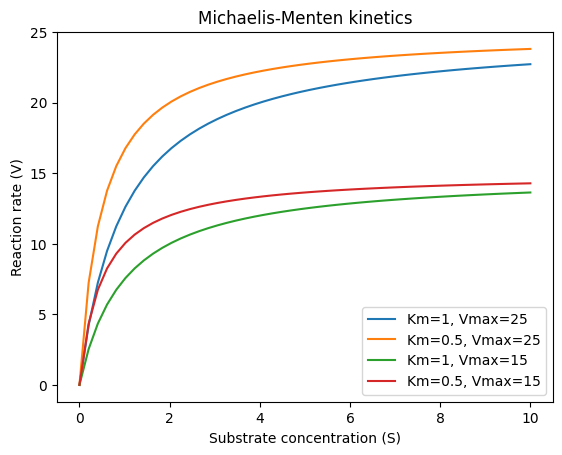

In [16]:
Km1 = 1
Km2 = 0.5
Vmax1 = 25
Vmax2 = 15
S_list = np.linspace(0, 10, 50)
V_list_1 = michaelis_menten(S_list, Km1, Vmax1)
V_list_2 = michaelis_menten(S_list, Km2, Vmax1)
V_list_3 = michaelis_menten(S_list, Km1, Vmax2)
V_list_4 = michaelis_menten(S_list, Km2, Vmax2)

plt.plot(S_list, V_list_1, label='Km=1, Vmax=25')
plt.plot(S_list, V_list_2, label='Km=0.5, Vmax=25')
plt.plot(S_list, V_list_3, label='Km=1, Vmax=15')
plt.plot(S_list, V_list_4, label='Km=0.5, Vmax=15')
plt.legend()
plt.xlabel('Substrate concentration (S)')
plt.ylabel('Reaction rate (V)')
plt.title('Michaelis-Menten kinetics')
plt.show()

With lower Vmax the net reaction rate is lower then with higher Vmax, thus the reaction rate stays below the Vmax value. 
With lower Km, is faster converging to Vmax then a higher Km. Which can also be explained as km = Vmax/2.

What would happen to Vmax and Km if we would add twice as much
enzyme to our experiment?

Vmax is calculated by the second K in the reaction multiplied by the total Enzyme concentration, which can be calculated as:
Etotal = E + ES
Vmax = K2 * Etotal

Thus doubling the E total will double the Vmax. While Km is not dependent on the enzyme concentration as it is a constant, so it will stay stable, unchanged

Exercise 2

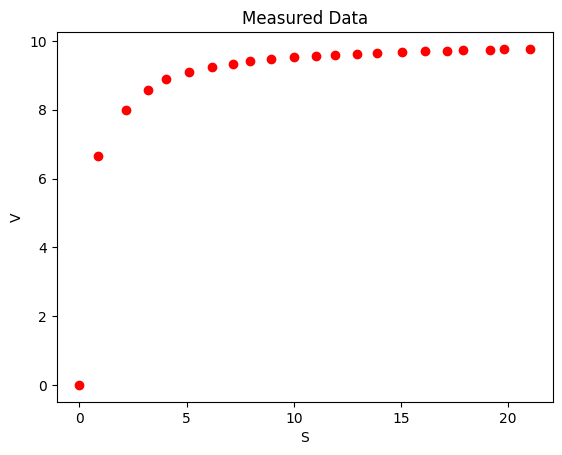

In [54]:
measuredData = pd.read_csv('Data/measuredData.csv', header=None, names = ["S", "V"])
S_data = measuredData["S"]
V_data = measuredData["V"]


plt.plot(S_data, V_data, 'ro')
plt.xlabel('S')
plt.ylabel('V')
plt.title('Measured Data')
plt.show()

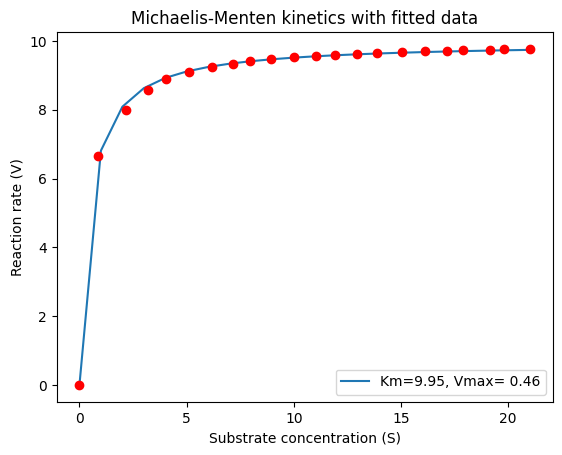

In [74]:
i = curve_fit(michaelis_menten, S_data, V_data, p0=[1, 1])
Km = i[0][0]
Vmax = i[0][1]
S_list = np.linspace(0, np.max(S_data), len(S_data))
V_list = michaelis_menten(S_list, Km, Vmax)
plt.plot(S_list, V_list, label=f'Km={np.round(Km, 2)}, Vmax= {np.round(Vmax, 2)}')
plt.plot(S_data, V_data, 'ro')
plt.legend()
plt.xlabel('Substrate concentration (S)')
plt.ylabel('Reaction rate (V)')
plt.title('Michaelis-Menten kinetics with fitted data')
plt.show()

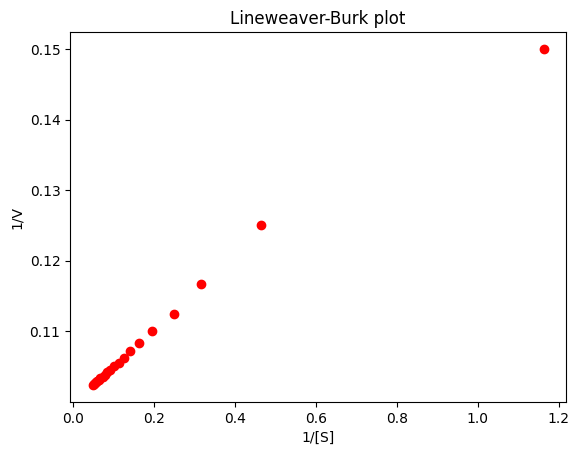

In [75]:
S_data_array = np.array(S_data)[1:]
V_data_array = np.array(V_data)[1:]

plt.plot(1/S_data_array, 1/V_data_array, 'ro')
plt.xlabel('1/[S]')
plt.ylabel('1/V')
plt.title('Lineweaver-Burk plot')
plt.show()


In [80]:
# Fit a linear function to the Lineweaver-Burk plot
def linear_function(x, a, b):
    return a + b * x

# Fit the data to the linear function
parameters = curve_fit(linear_function, 1/S_data_array, 1/V_data_array)

# Extract the y-intercept and slope
a, b = parameters[0]

# Calculate Vmax and Km from Lineweaver-Burk parameters
Vmax_lb = 1 / a
Km_lb = b * Vmax_lb

print("Vmax from Lineweaver-Burk plot:", Vmax_lb)
print("Km from Lineweaver-Burk plot:", Km_lb)

print("Vmax from Michaelis-Menten plot:", Vmax)
print("Km from Michaelis-Menten plot:", Km)



Vmax from Lineweaver-Burk plot: 9.916773247300549
Km from Lineweaver-Burk plot: 0.4367262413035133
Vmax from Michaelis-Menten plot: 0.4623630958442521
Km from Michaelis-Menten plot: 9.953687379667791
